# Inhaltsverzeichnis

| Abschnitt | Unterabschnitt |
|-----------|----------------|
| **[Zeitreihenzerlegung für tägliche und monatliche Brandhäufigkeiten](#zeitreihenzerlegung-fuer-taegliche-und-monatliche-brandhaeufigkeiten)** | |
| **[Log-Transformierte Zeitreihenzerlegung mit STL](#log-transformierte-zeitreihenzerlegung-mit-stl)** | [Hauptpunkte](#hauptpunkte:), [Ergebnisse](#ergebnisse:) |


# Zeitreihenzerlegung für tägliche und monatliche Brandhäufigkeiten

Dieser Code analysiert die **täglichen** und **monatlichen Brandhäufigkeiten** mithilfe einer **STL-Zeitreihenzerlegung (Seasonal and Trend decomposition using Loess)**:

1. **Datenquellen**:
   - Tägliche Daten aus `daily_fire_counts.csv`.
   - Monatliche Daten aus `monthly_fire_counts.csv`.

2. **STL-Zeitreihenzerlegung**:
   - Zerlegt die Brandhäufigkeiten in die Komponenten:
     - **Trend**: Langfristige Entwicklung.
     - **Saisonalität**: Wiederkehrende Muster (z. B. Jahreszeiten).
     - **Residuals**: Zufällige Schwankungen.
   - Führt zusätzlich eine Zerlegung für **log-transformierte Daten** durch.
   - **Warum STL?** Die STL-Zerlegung wurde gewählt, da sie flexibel ist, robust gegenüber Ausreißern, und besser mit nicht-stationären Saisonalitäten umgehen kann.

3. **Visualisierung**:
   - Diagramme werden im Ordner **Abbildungen** unter den folgenden Namen gespeichert:
     - Für tägliche Daten:
       - `daily_fire_count_decomposition.png`
       - `daily_log_fire_count_decomposition.png`
     - Für monatliche Daten:
       - `monthly_fire_count_decomposition.png`
       - `monthly_log_fire_count_decomposition.png`.


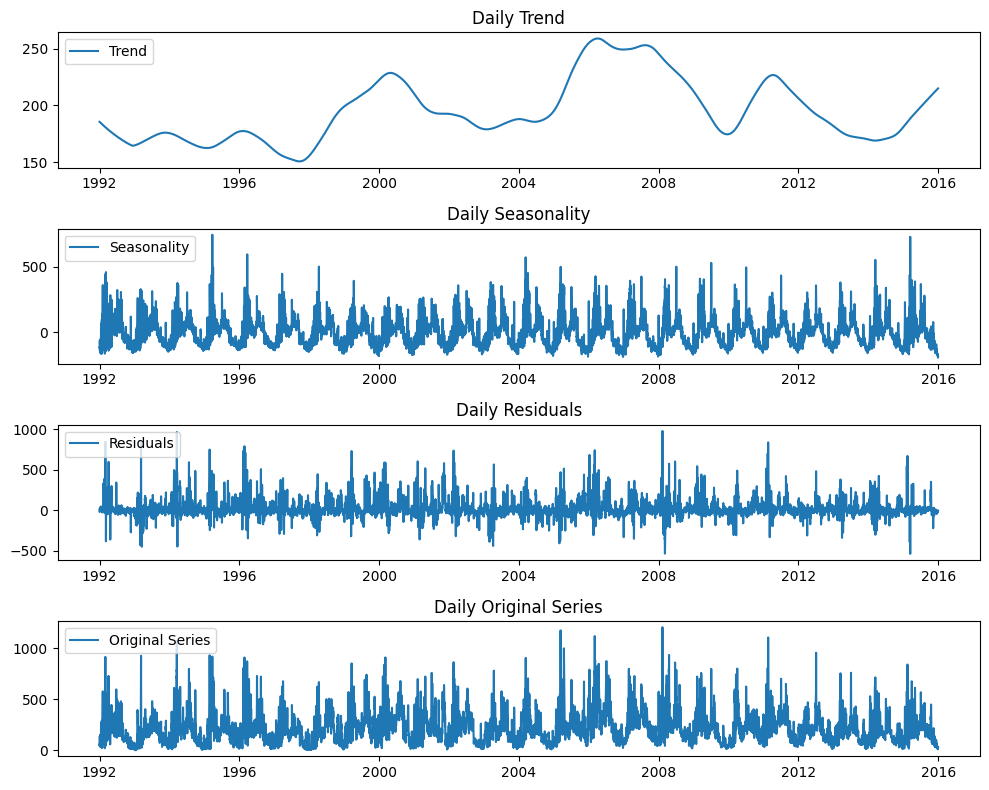

Daily STL decomposition plot saved at: ./Abbildungen/daily_fire_count_stl_decomposition.png


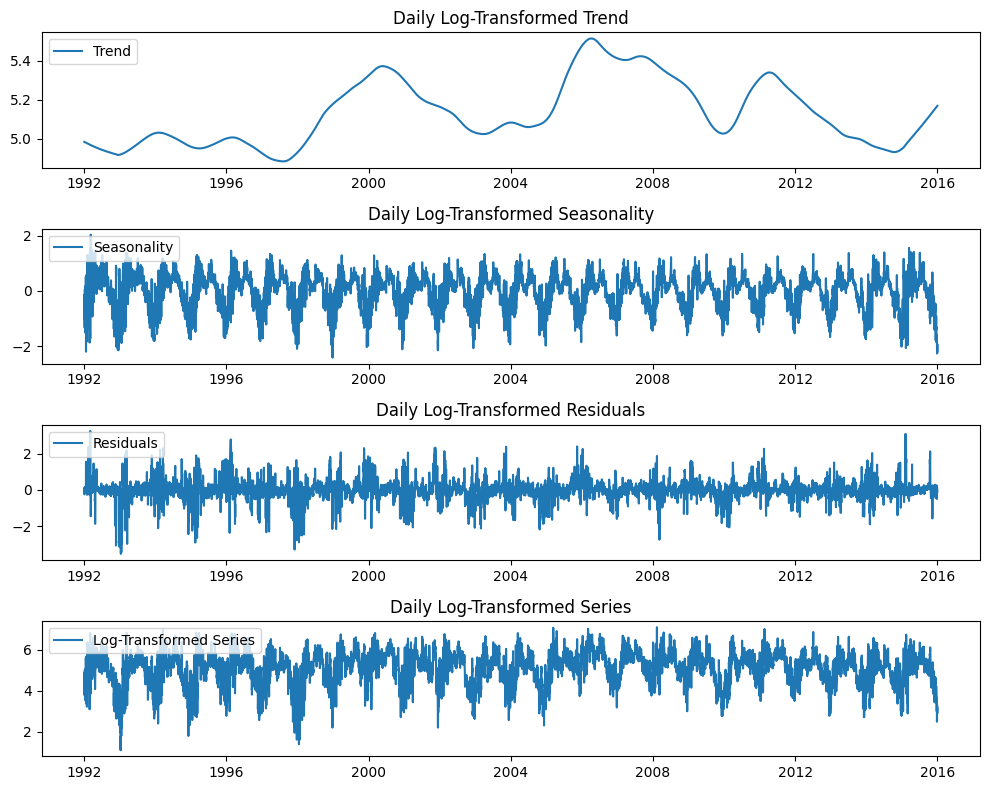

Daily log-transformed STL decomposition plot saved at: ./Abbildungen/daily_log_fire_count_stl_decomposition.png


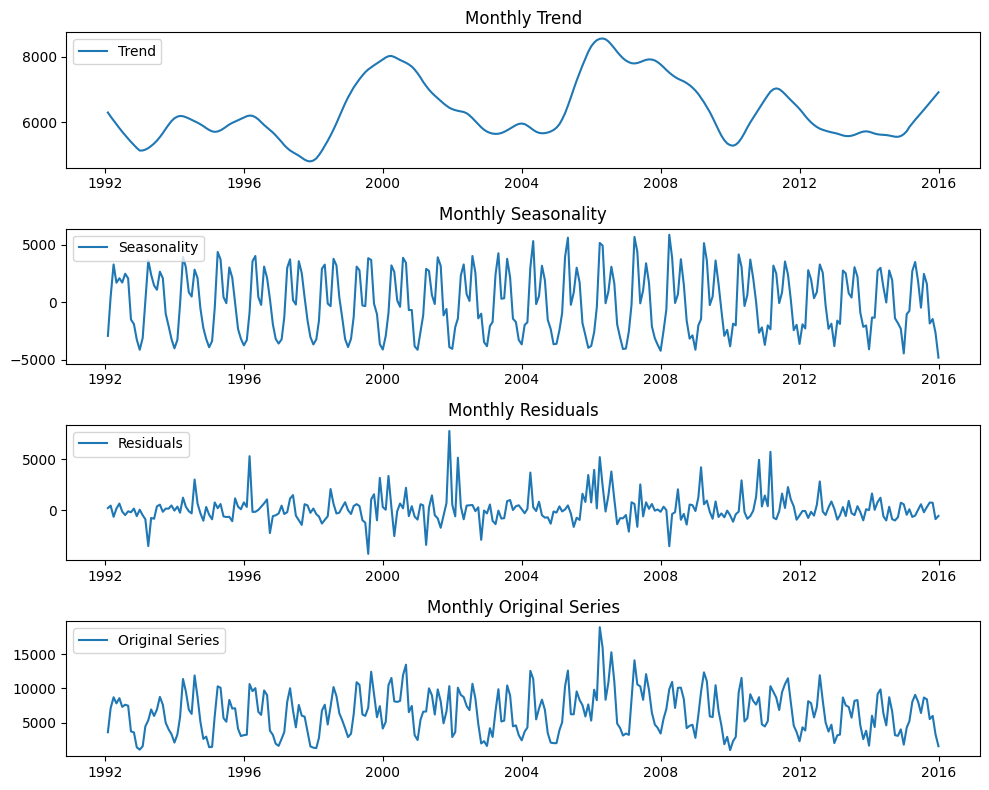

Monthly STL decomposition plot saved at: ./Abbildungen/monthly_fire_count_stl_decomposition.png


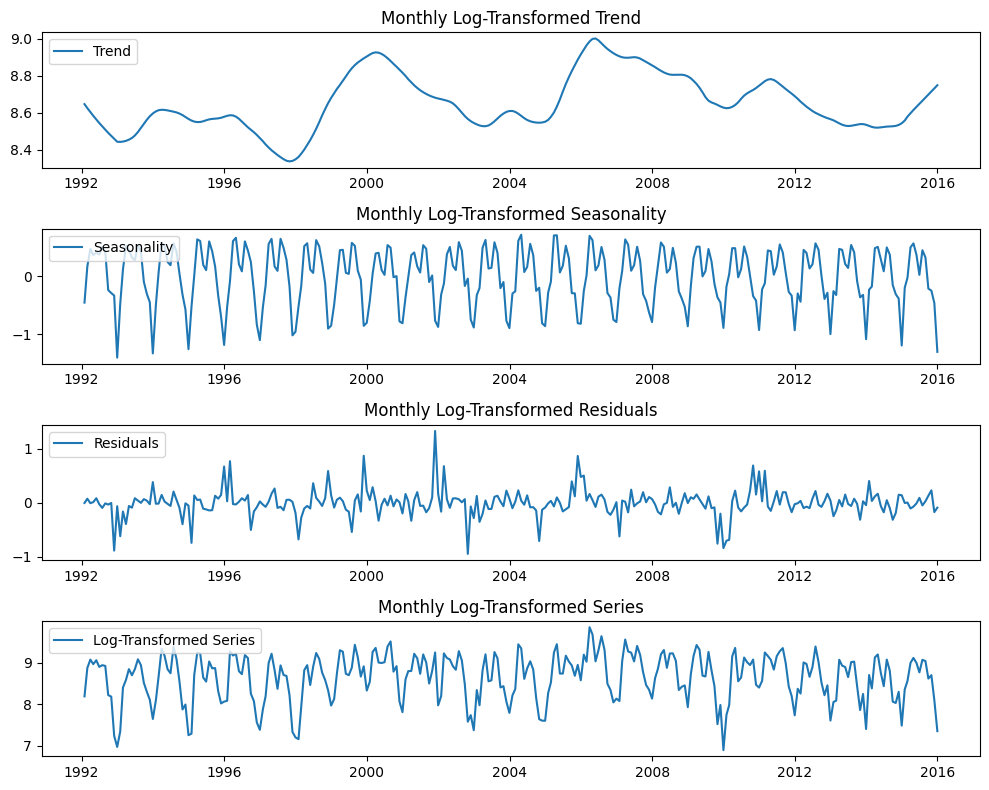

Monthly log-transformed STL decomposition plot saved at: ./Abbildungen/monthly_log_fire_count_stl_decomposition.png


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import STL

# File paths
daily_file_path = r"./Data_Waldbrand_Zeitreihen/daily_fire_counts.csv"
monthly_file_path = r"./Data_Waldbrand_Zeitreihen/monthly_fire_counts.csv"

# Load the daily fire counts data
daily_data = pd.read_csv(daily_file_path)
daily_data.rename(columns={"DISCOVERY_DATE": "Date", "Daily Fire Counts": "Fire_Count"}, inplace=True)
daily_data['Date'] = pd.to_datetime(daily_data['Date'])
daily_data.set_index('Date', inplace=True)

# Perform STL decomposition for daily fire counts
stl_daily = STL(daily_data['Fire_Count'], period=365, robust=True).fit()

# Create and save the plot for daily decomposition components
plt.figure(figsize=(10, 8))

# Plot the trend component
plt.subplot(411)
plt.plot(stl_daily.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Daily Trend')

# Plot the seasonal component
plt.subplot(412)
plt.plot(stl_daily.seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.title('Daily Seasonality')

# Plot the residual component
plt.subplot(413)
plt.plot(stl_daily.resid, label='Residuals')
plt.legend(loc='upper left')
plt.title('Daily Residuals')

# Plot the original data
plt.subplot(414)
plt.plot(daily_data['Fire_Count'], label='Original Series')
plt.legend(loc='upper left')
plt.title('Daily Original Series')

plt.tight_layout()

# Save the plot to the 'Abbildungen' folder
daily_output_path = r"./Abbildungen/daily_fire_count_stl_decomposition.png"
plt.savefig(daily_output_path)
plt.show()

print(f"Daily STL decomposition plot saved at: {daily_output_path}")

# Log-transform the daily fire counts
daily_data['Log_Fire_Count'] = np.log1p(daily_data['Fire_Count'])

# Perform STL decomposition for log-transformed daily fire counts
stl_daily_log = STL(daily_data['Log_Fire_Count'], period=365, robust=True).fit()

# Create and save the plot for log-transformed daily decomposition components
plt.figure(figsize=(10, 8))

# Plot the trend component
plt.subplot(411)
plt.plot(stl_daily_log.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Daily Log-Transformed Trend')

# Plot the seasonal component
plt.subplot(412)
plt.plot(stl_daily_log.seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.title('Daily Log-Transformed Seasonality')

# Plot the residual component
plt.subplot(413)
plt.plot(stl_daily_log.resid, label='Residuals')
plt.legend(loc='upper left')
plt.title('Daily Log-Transformed Residuals')

# Plot the original data
plt.subplot(414)
plt.plot(daily_data['Log_Fire_Count'], label='Log-Transformed Series')
plt.legend(loc='upper left')
plt.title('Daily Log-Transformed Series')

plt.tight_layout()

# Save the plot to the 'Abbildungen' folder
daily_log_output_path = r"./Abbildungen/daily_log_fire_count_stl_decomposition.png"
plt.savefig(daily_log_output_path)
plt.show()

print(f"Daily log-transformed STL decomposition plot saved at: {daily_log_output_path}")

# Load the monthly fire counts data
monthly_data = pd.read_csv(monthly_file_path)
monthly_data.rename(columns={"DISCOVERY_DATE": "Date", "Monthly Fire Counts": "Fire_Count"}, inplace=True)
monthly_data['Date'] = pd.to_datetime(monthly_data['Date'])
monthly_data.set_index('Date', inplace=True)

# Perform STL decomposition for monthly fire counts
stl_monthly = STL(monthly_data['Fire_Count'], period=12, robust=True).fit()

# Create and save the plot for monthly decomposition components
plt.figure(figsize=(10, 8))

# Plot the trend component
plt.subplot(411)
plt.plot(stl_monthly.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Monthly Trend')

# Plot the seasonal component
plt.subplot(412)
plt.plot(stl_monthly.seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.title('Monthly Seasonality')

# Plot the residual component
plt.subplot(413)
plt.plot(stl_monthly.resid, label='Residuals')
plt.legend(loc='upper left')
plt.title('Monthly Residuals')

# Plot the original data
plt.subplot(414)
plt.plot(monthly_data['Fire_Count'], label='Original Series')
plt.legend(loc='upper left')
plt.title('Monthly Original Series')

plt.tight_layout()

# Save the plot to the 'Abbildungen' folder
monthly_output_path = r"./Abbildungen/monthly_fire_count_stl_decomposition.png"
plt.savefig(monthly_output_path)
plt.show()

print(f"Monthly STL decomposition plot saved at: {monthly_output_path}")

# Log-transform the monthly fire counts
monthly_data['Log_Fire_Count'] = np.log1p(monthly_data['Fire_Count'])

# Perform STL decomposition for log-transformed monthly fire counts
stl_monthly_log = STL(monthly_data['Log_Fire_Count'], period=12, robust=True).fit()

# Create and save the plot for log-transformed monthly decomposition components
plt.figure(figsize=(10, 8))

# Plot the trend component
plt.subplot(411)
plt.plot(stl_monthly_log.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Monthly Log-Transformed Trend')

# Plot the seasonal component
plt.subplot(412)
plt.plot(stl_monthly_log.seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.title('Monthly Log-Transformed Seasonality')

# Plot the residual component
plt.subplot(413)
plt.plot(stl_monthly_log.resid, label='Residuals')
plt.legend(loc='upper left')
plt.title('Monthly Log-Transformed Residuals')

# Plot the original data
plt.subplot(414)
plt.plot(monthly_data['Log_Fire_Count'], label='Log-Transformed Series')
plt.legend(loc='upper left')
plt.title('Monthly Log-Transformed Series')

plt.tight_layout()

# Save the plot to the 'Abbildungen' folder
monthly_log_output_path = r"./Abbildungen/monthly_log_fire_count_stl_decomposition.png"
plt.savefig(monthly_log_output_path)
plt.show()

print(f"Monthly log-transformed STL decomposition plot saved at: {monthly_log_output_path}")


# Log-Transformierte Zeitreihenzerlegung mit STL

Der Code zerlegt die **täglichen** und **monatlichen Brandhäufigkeiten** mithilfe einer **STL-Zeitreihenzerlegung (Seasonal and Trend decomposition using Loess)** auf log-transformierten Daten.

### Hauptpunkte:
- **Log-Transformation**: \(\log(x+1)\), um die Daten additiv zu machen und große Ausreißer zu reduzieren.
- **STL-Zeitreihenzerlegung**:
  - Zerlegung in:
    - **Trend**: Langfristige Entwicklung.
    - **Saisonalität + Trend**: Kombinierte Darstellung zur besseren Übersicht.
  - **Warum STL?** STL wurde gewählt, da es robust gegenüber Ausreißern ist und nicht-stationäre saisonale Muster besser handhaben kann als klassische additive Methoden.
- **Komponenten**:
  - Grau: Log-transformierte Daten.
  - Blau: Trend (gestrichelt).
  - Grün: Saisonalität + Trend.

### Ergebnisse:
Die Diagramme werden gespeichert unter:
- `daily_fire_count_overlay_log_decomposition.png`
- `monthly_fire_count_overlay_log_decomposition.png`.


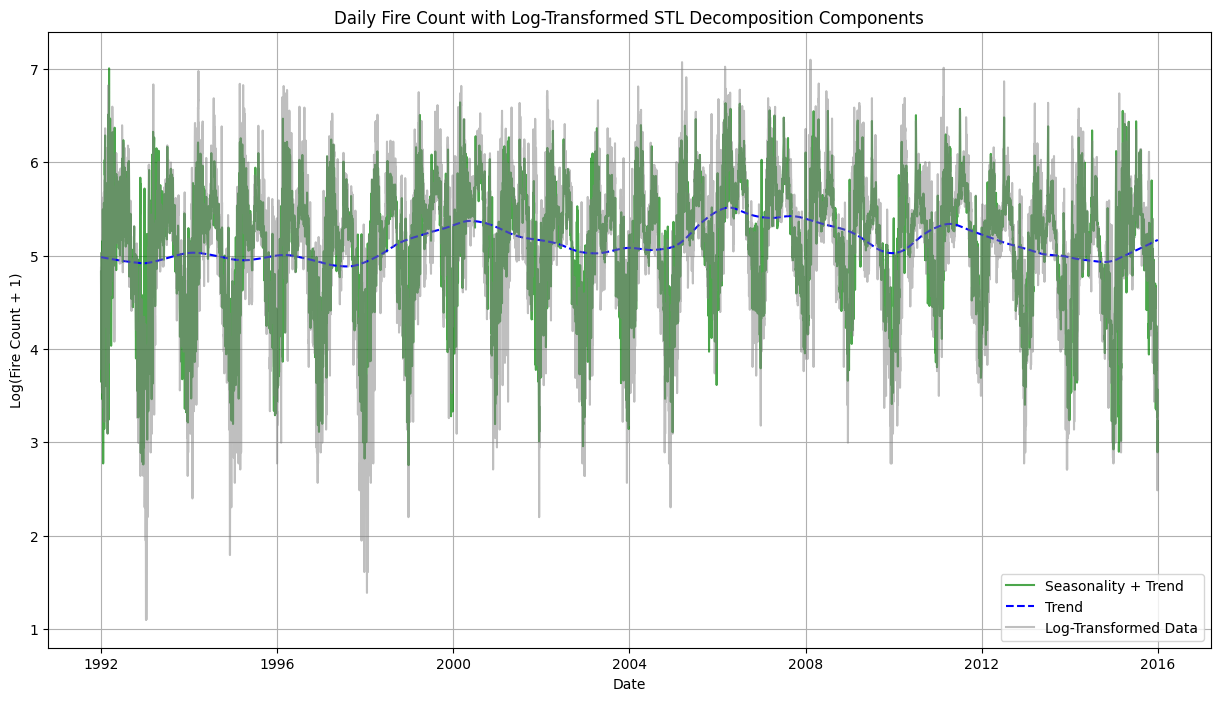

Daily log-transformed STL decomposition overlay plot saved at: ./Abbildungen/daily_fire_count_stl_log_decomposition.png


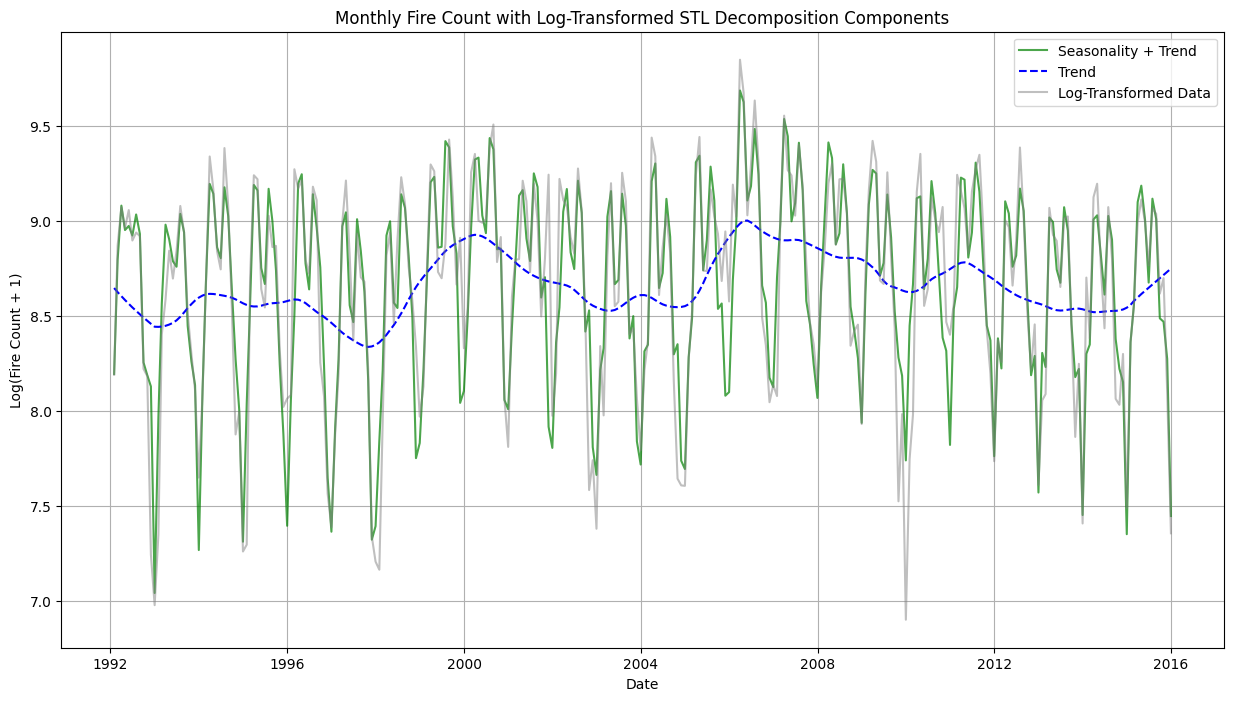

Monthly log-transformed STL decomposition overlay plot saved at: ./Abbildungen/monthly_fire_count_stl_log_decomposition.png


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
import numpy as np

# File paths
daily_file_path = r"./Data_Waldbrand_Zeitreihen/daily_fire_counts.csv"
monthly_file_path = r"./Data_Waldbrand_Zeitreihen/monthly_fire_counts.csv"

# Load the daily fire counts data
daily_data = pd.read_csv(daily_file_path)
daily_data.rename(columns={"DISCOVERY_DATE": "Date", "Daily Fire Counts": "Fire_Count"}, inplace=True)
daily_data['Date'] = pd.to_datetime(daily_data['Date'])
daily_data.set_index('Date', inplace=True)

# Apply logarithmic transformation to make the data more additive
daily_data['Log_Fire_Count'] = np.log1p(daily_data['Fire_Count'])

# Perform STL decomposition for log-transformed daily fire counts
stl_daily_log = STL(daily_data['Log_Fire_Count'], period=365, robust=True).fit()

# Create an overlay plot for daily decomposition components
plt.figure(figsize=(15, 8))
plt.plot(stl_daily_log.seasonal + stl_daily_log.trend, color='green', label='Seasonality + Trend', alpha=0.7)
plt.plot(stl_daily_log.trend, color='blue', label='Trend', linestyle='--')
plt.plot(daily_data['Log_Fire_Count'], color='gray', alpha=0.5, label='Log-Transformed Data')
plt.title('Daily Fire Count with Log-Transformed STL Decomposition Components')
plt.xlabel('Date')
plt.ylabel('Log(Fire Count + 1)')
plt.legend()
plt.grid()

# Save the overlay plot to the 'Abbildungen' folder
daily_overlay_output_path = r"./Abbildungen/daily_fire_count_stl_log_decomposition.png"
plt.savefig(daily_overlay_output_path, dpi=300)
plt.show()

print(f"Daily log-transformed STL decomposition overlay plot saved at: {daily_overlay_output_path}")

# Load the monthly fire counts data
monthly_data = pd.read_csv(monthly_file_path)
monthly_data.rename(columns={"DISCOVERY_DATE": "Date", "Monthly Fire Counts": "Fire_Count"}, inplace=True)
monthly_data['Date'] = pd.to_datetime(monthly_data['Date'])
monthly_data.set_index('Date', inplace=True)

# Apply logarithmic transformation to make the data more additive
monthly_data['Log_Fire_Count'] = np.log1p(monthly_data['Fire_Count'])

# Perform STL decomposition for log-transformed monthly fire counts
stl_monthly_log = STL(monthly_data['Log_Fire_Count'], period=12, robust=True).fit()

# Create an overlay plot for monthly decomposition components
plt.figure(figsize=(15, 8))
plt.plot(stl_monthly_log.seasonal + stl_monthly_log.trend, color='green', label='Seasonality + Trend', alpha=0.7)
plt.plot(stl_monthly_log.trend, color='blue', label='Trend', linestyle='--')
plt.plot(monthly_data['Log_Fire_Count'], color='gray', alpha=0.5, label='Log-Transformed Data')
plt.title('Monthly Fire Count with Log-Transformed STL Decomposition Components')
plt.xlabel('Date')
plt.ylabel('Log(Fire Count + 1)')
plt.legend()
plt.grid()

# Save the overlay plot to the 'Abbildungen' folder
monthly_overlay_output_path = r"./Abbildungen/monthly_fire_count_stl_log_decomposition.png"
plt.savefig(monthly_overlay_output_path, dpi=300)
plt.show()

print(f"Monthly log-transformed STL decomposition overlay plot saved at: {monthly_overlay_output_path}")
